# Social network analysis

There are many different ways to visualize social networks or connections between data points. In this notebook we will be looking at a few different ways to visualize a social network and how to manipulate our graph.

## Libraries and Resources used

-  Python 3
-  matplotlib
-  pandas
-  networkx

## Note:

For installation of the nessesary resources and libraries refer to their respective home page for installation steps for your operation system.


Written in November 2018

## CSV as Input

CSV stands for comma seperated values, it is simple file format used to store tabular data. It a format that is support by many different type of databases and excel to name a few. In this notebook we will be using 2 dummy CSV. These CSV will mimic a small social network, with a few names and their connections. Before we move forward we need to disucss some aspects of a graph of this nature.

First is the concepts of Nodes and Edges. Think of nodes as points of interest, whether they are people, places, event, etc. The second is edges, these are the connections between nodes. They are used to indicate some form of relationship between nodes whether that be friendship, part of, etc.

The two CSV represent one of these aspect.

The first CSV called "networkNode.csv" contains:
* name
* group
* nodeSize

In this example it represents a person in our network (node)

The second CSV called "networkEdge.csv" contains:
* source
* target
* value

In this example this represents the connection between people and the value of that relationship

## Importing all the required Libraries

Before we being we will import all the required libraries for the notebook

In [ ]:
# Importing libraries
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

# Ensures graphs display in notebook
%matplotlib inline

We first will declare a graph and read in the two CSVs 

In [3]:
# Declare the graph
Networkgraph = nx.Graph(day="Some Title?")

# Load in the graph nodes and edges
Networkgraph_nodes = pd.read_csv('./networkNode.csv')
Networkgraph_edges = pd.read_csv('./networkEdge.csv')

Now that we initialized the graph and loaded in the required data, we can begin populating our graph. This is done by interating through all the different nodes and edges and adding them into the graph

In [24]:
# Adding the nodes to the graph
for index, row in Networkgraph_nodes.iterrows():
    Networkgraph.add_node(row['name'], group=row['group'], nodeSize=row['nodeSize'])

# Adding the edges to the graph    
for index, row in Networkgraph_edges.iterrows():
    Networkgraph.add_weighted_edges_from([(row['source'], row['target'], row['value'])])

If you recalled from before, each node has a "group" assoicated to them. To help illistrate these groups we can assign them a colour, therefore making these groups more apparent when we display our graph. In addition we can also manipulate other factors about the graph such as font or edge colour.

In [7]:
# Colour each node of a group by a given colour     
color_map = {1:'#d2f5f0', 2:'#eebcbc', 3:'#72bbd0'} 

# The size of our graph
plt.figure(figsize=(25,25))

# Different option setting (full list see: https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.drawing.nx_pylab.draw_networkx.html#networkx.drawing.nx_pylab.draw_networkx )
options = {
    'edge_color': '#000000',  #Changes the connecting line colour
    'width': 1,               #Width of line
    'with_labels': True,      #Enable labels
    'font_weight': 'regular', #Normal Font
}

# Assign the colours to the map
colors = [color_map[Networkgraph.node[node]['group']] for node in Networkgraph]

# Assign the size for the nodes 
sizes = [Networkgraph.node[node]['nodeSize']*10 for node in Networkgraph]

Now that all the options for our graph is completed, we can can display our graph. It is important to know we are using "nx.spring_layout" which uses "k" (0-1) to determine distance between nodes and how many interation it uses to generate the graph

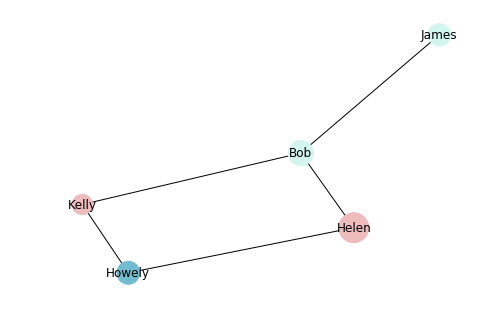

In [20]:
# Draws the Graph
nx.draw(Networkgraph, node_color=colors, node_size=sizes, pos=nx.spring_layout(Networkgraph, k=0.25, iterations=50), **options)

## Conclusion

As you can see what we demostrated uses a small dataset, however this graph can be used to map a large amount of data as seen here:

https://app.dominodatalab.com/u/LeJit/FacebookNetwork/view/results/SocialNetwork.html
https://www.kaggle.com/jncharon/python-network-graph/notebook

This notebook in particular is to serve as a more introductory notebook into social network graph. Providing a simple and fast way to graph you data. For more complex graph see the documentation for networkx for full options and tools you can play with (in addition to the resources present here).